<a href="https://colab.research.google.com/github/sanjithrana/AI-ML-TASKS/blob/main/AI_ML_TASKS_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
# 1. Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

In [46]:
print("Dataset shape:", X.shape)
print("Target classes:", iris.target_names)


Dataset shape: (150, 4)
Target classes: ['setosa' 'versicolor' 'virginica']


In [47]:

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [48]:
# 3. Normalize features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [49]:
# 4. Train & Evaluate KNN with different values of K
k_values = [1, 3, 5, 7, 9, 11]
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    print(f"K={k} -> Accuracy: {acc:.3f}")


K=1 -> Accuracy: 0.967
K=3 -> Accuracy: 0.933
K=5 -> Accuracy: 0.933
K=7 -> Accuracy: 0.967
K=9 -> Accuracy: 0.967
K=11 -> Accuracy: 0.967


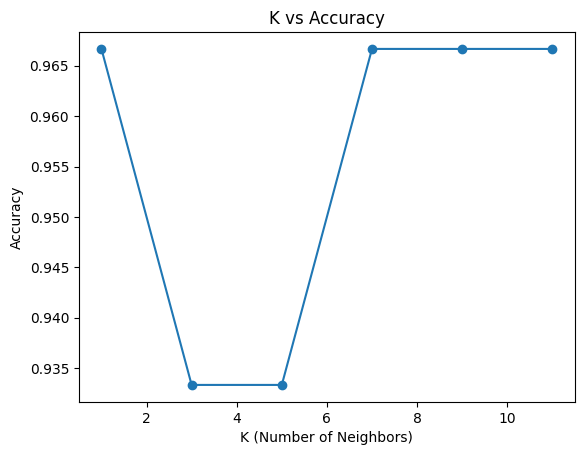

In [50]:
# Plot K vs Accuracy
plt.plot(k_values, accuracy_scores, marker="o")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.show()

In [51]:
# Choose best K (example: 5)
best_k = k_values[np.argmax(accuracy_scores)]
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

In [52]:
print("\nBest K =", best_k)
print("Classification Report:\n", classification_report(y_test, y_pred_best, target_names=iris.target_names))



Best K = 1
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



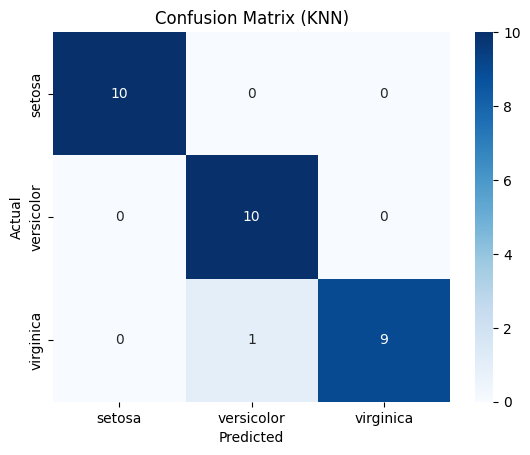

In [53]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (KNN)")
plt.show()

In [54]:
# 5. Visualize decision boundaries (only 2D features for visualization)
from matplotlib.colors import ListedColormap

X_vis = X.iloc[:, :2].values  # take only 2 features for visualization
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42, stratify=y
)

In [55]:
scaler_vis = StandardScaler()
X_train_vis = scaler_vis.fit_transform(X_train_vis)
X_test_vis = scaler_vis.transform(X_test_vis)

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)


KNeighborsClassifier(n_neighbors=1)

In [56]:
# Decision boundary
x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))


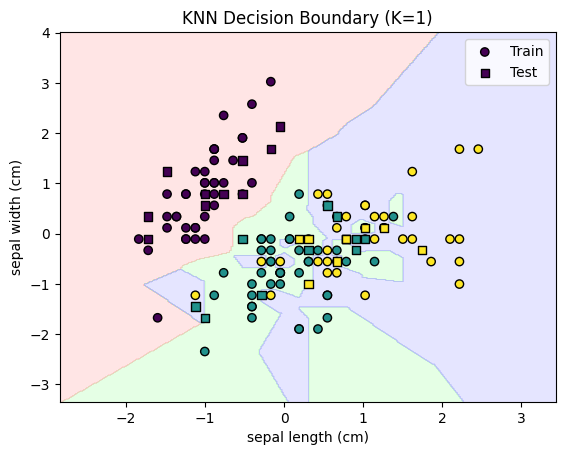

In [57]:
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"]))
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, edgecolor="k", marker="o", label="Train")
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis, edgecolor="k", marker="s", label="Test")
plt.title(f"KNN Decision Boundary (K={best_k})")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()